In [160]:
import torch
from torch import nn
import torch
from torch.utils.data import Dataset, DataLoader
import torch.functional as F
from tqdm import tqdm

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1XwilcXbk5fAI1tGxzBvR6PzWX0-NFk6r?usp=sharing)


# **Week 7 - Introduction to Activation Functions.**

## **Abstract**

1. **Introduction to Activation Functions.**: Activation functions in neural networks, such as sigmoid, ReLU, and softmax, apply non-linear transformations to inputs, enabling the network to capture complex data patterns and behaviors.

2. **Introduction to Non-Linear Layers**: Non-linear layers in neural networks transform linear inputs into non-linear outputs using activation functions, enabling the network to handle complex, non-linear relationships in data.


>### **References: Essential Resources for Further Learning**
>
>- **PyTorch**: [Official Documentation](https://pytorch.org/docs/stable/index.html)
>- **Activation Functions in Neural Networks**: [Online Course](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)
>- **Activation Functions in Neural Networks [12 Types & Use Cases]**: [Blog](https://www.v7labs.com/blog/neural-networks-activation-functions)


Feel free to explore these resources to deepen your understanding of data visualization, data management, and computational tools in Chemistry.





## **Beyond Linear Models - Introduction to Internal Parameters**


In extending the linear model to a **non-linear model**, the function $f(\mathbf{x})$ becomes dependent on both external and internal parameters. This can be dissected as follows:

- **Non-Linear Model Representation**:
  - The model is now expressed as 
    $$
    f(\mathbf{x}) = \mathbf{w}^\top \phi(\mathbf{x},\mathbf{w}') = \sum_i w_i \phi_i(\mathbf{x},\mathbf{w}').
    $$
  - In this representation, $\phi(\mathbf{x},\mathbf{w}')$ indicates a non-linear map to a new **feature representation**, which also depends on internal parameters $\mathbf{w}'$.

- **Internal Parameter Optimization**:
  - The model includes optimization of the non-linear parameters $\mathbf{w}'$.
  - This introduces an additional layer of complexity compared to the linear model, as $\mathbf{w}'$ need to be adjusted along with $\mathbf{w}$.

Let's assume $\phi(\mathbf{x},\mathbf{w}')$ is another linear model,\
$\phi(\mathbf{x},\mathbf{w}') = \mathbf{z} = [z_0,z_1,\cdots,z_\ell]$, where $\ell$ is the "new" number of features.




In [161]:
# Function
def f(x):
 return -(1.4 - 3.0 * x) * torch.sin(18.0 * x)

def get_data(n_batch=200):
    # X = torch.randn((n_batch,1))
    X = torch.distributions.uniform.Uniform(-0.01,1.).sample([n_batch,1])
    y = f(X)
    return X,y

In [170]:
# Model definition
model = nn.Sequential(
  nn.Linear(1, 10),
  nn.Linear(10, 100),
  nn.Linear(100, 75),
  nn.Linear(75, 1)
    )
for p in model.parameters():
    if p.requires_grad:
        print(p.name, p.data.shape)

None torch.Size([10, 1])
None torch.Size([10])
None torch.Size([100, 10])
None torch.Size([100])
None torch.Size([75, 100])
None torch.Size([75])
None torch.Size([1, 75])
None torch.Size([1])


In [173]:
# Training function
def training(model,training_iter=500, n_batch=50, lr=0.05, feedback_interval=5):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    model.train()
    X, y_true = get_data(n_batch)
    for itr in range(1, training_iter + 1):
        
        output = model(X)
        loss_val = loss_fn(output, y_true)

        optimizer.zero_grad()
        loss_val.backward()
        optimizer.step()

        if itr % feedback_interval == 0:
            print(f'Iteration = {itr}, Loss = {loss_val.item():.4f}')

    return model

In [174]:
def plot_model_performance(model, n_samples=75, n_grid_points=5000):
    plt.clf()
    X, y = get_data(n_samples)
    X_grid = torch.linspace(0., 1., n_grid_points).unsqueeze(1)

    plt.scatter(X.detach().numpy(), y.detach().numpy(), label='Data')
    plt.plot(X_grid.detach().numpy(), f(X_grid).detach().numpy(), ls='--', c='k', label=r'$f(x)$')
    plt.plot(X_grid.detach().numpy(), model(X_grid).detach().numpy(), c='red', label=r'$NN(x)$')

    plt.ylabel(r'$f(x)$', fontsize=12)
    plt.xlabel(r'$x$', fontsize=12)
    plt.legend()

Iteration = 5, Loss = 12.0436
Iteration = 10, Loss = 0.5256
Iteration = 15, Loss = 0.3952
Iteration = 20, Loss = 0.5745
Iteration = 25, Loss = 0.4577
Iteration = 30, Loss = 0.4106
Iteration = 35, Loss = 0.4372
Iteration = 40, Loss = 0.4572
Iteration = 45, Loss = 0.3998
Iteration = 50, Loss = 0.4139
Iteration = 55, Loss = 0.3975
Iteration = 60, Loss = 0.3978
Iteration = 65, Loss = 0.3952
Iteration = 70, Loss = 0.3935
Iteration = 75, Loss = 0.3935
Iteration = 80, Loss = 0.3924
Iteration = 85, Loss = 0.3927
Iteration = 90, Loss = 0.3922
Iteration = 95, Loss = 0.3922
Iteration = 100, Loss = 0.3922
Iteration = 105, Loss = 0.3921
Iteration = 110, Loss = 0.3921
Iteration = 115, Loss = 0.3921
Iteration = 120, Loss = 0.3921
Iteration = 125, Loss = 0.3921
Iteration = 130, Loss = 0.3921
Iteration = 135, Loss = 0.3921
Iteration = 140, Loss = 0.3921
Iteration = 145, Loss = 0.3921
Iteration = 150, Loss = 0.3921
Iteration = 155, Loss = 0.3921
Iteration = 160, Loss = 0.3921
Iteration = 165, Loss = 0.3

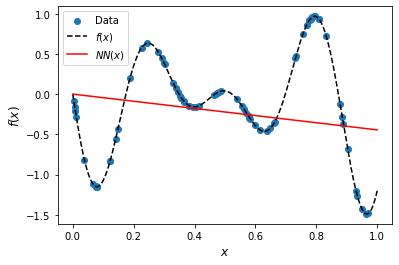

In [175]:
model_trained = training(model)
plot_model_performance(model_trained)

### **Non-Linear Layers**

Consider the composition of two linear models:

$$
f(x,\{\mathbf{W}\}_{\ell=1}^{2}) = \mathbf{W}_2^\top (\mathbf{x}\mathbf{W}^\top_1) = \mathbf{z}\mathbf{W}^\top_2
$$

<br>

In this expression, $\mathbf{W}_1$ and $\mathbf{W}_2$ are the weight matrices of the two linear models. The function $f(x,\{\mathbf{W}\}_{\ell=1}^{2})$ can be rewritten to highlight the composition of these models:

$$
f(x,\{\mathbf{W}\}_{\ell=1}^{2}) = \mathbf{W}_2^\top \phi(\mathbf{W}_1, \mathbf{x})
$$

<br>

Where the function $\phi(\mathbf{W}_1, \mathbf{x})$ is defined as the product of the input $\mathbf{x}$ and the transpose of the first weight matrix $\mathbf{W}_1$:



$$
\phi(\mathbf{W}_1, \mathbf{x}) = \mathbf{x}\mathbf{W}^\top_1
$$


## **Introducting Activation functions**

Let's revisit the structure of Nueral Networks to understand activation functions:

<!DOCTYPE html>
<html>
<head>
    <style>
        .centered-image {
            display: block;
            margin-left: auto;
            margin-right: auto;
            width: 50%;
        }
    </style>
</head>
<body>

<a href="https://www.geeksforgeeks.org/activation-functions/" target="_blank">
    <img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/33-1-1.png"
         alt="Varied Initial Conditions for Gradient Descent"
         class="centered-image">
</a>

<br>
<figcaption align = "center"><b>Figure 1 - Activation Functions. Figure by
Vineet Joshi.</b></figcaption>

</body>
</html>

<br>

An **activation function** (also known as "transfer functions") in a neural networks define how the weighted sum of the input (**Wnj**) is transformed into an output from a node or nodes in a layer of the network.

<br>

<!DOCTYPE html>
<html>
<head>
    <style>
        .centered-image {
            display: block;
            margin-left: auto;
            margin-right: auto;
            width: 50%;
        }
    </style>
</head>
<body>

<a href="https://prabhakar-rangarao.medium.com/activation-functions-9020acfa80b6" target="_blank">
    <img src="https://miro.medium.com/v2/resize:fit:1358/1*uUzr1DsZm5P6IqRXIlpfhQ.gif"
         alt="Activation Functions Animated"
         class="centered-image">
</a>

<br>
<figcaption align = "center"><b>Figure 2 - Activation Functions Animated. Figure by
Prabhakar Rangarao.</b></figcaption>

</body>
</html>

<br>

Typically, a differentiable nonlinear activation function is used in the hidden layers of a neural network. This allows the model to learn more complex functions than a network trained using a linear activation function.

<br>

* Hyperbolic tangent
$$
tanh(x) = \frac{\exp(x)-\exp(-x)}{\exp(x)+\exp(-x)}
$$

* Sigmoid
$$
\text{softmax}(x_i) = \frac{1}{1+ \exp(-x)}
$$

* ReLU
$$
\text{ReLU}(x) = \max(0,x)
$$

* Leaky RLU
$$
\text{LeakyReLU}(x) = \max(0,x) + \beta*\min(0,x)
$$

* SiLU
$$
\text{SiLU}(x) = x * \sigma(x)\\
\sigma(x) = \frac{1}{1+\exp(-x)}
$$


In [ ]:
x = torch.linspace(-5,5,1000)

act_tanh = nn.Tanh()
y_tanh = act_tanh(x)

act_sigmoid = nn.Sigmoid()
y_sigmoid = act_sigmoid(x)

act_relu = nn.ReLU()
y_relu = act_relu(x)

act_lrelu = nn.LeakyReLU(0.1)
y_lrelu = act_lrelu(x)

act_silu = nn.SiLU()
y_silu = act_silu(x)

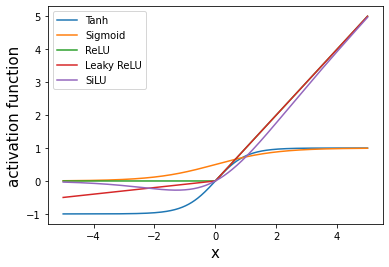

In [176]:
xnp = x.detach().numpy()
plt.plot(xnp,y_tanh.detach().numpy(),label='Tanh')
plt.plot(xnp,y_sigmoid.detach().numpy(),label='Sigmoid')
plt.plot(xnp,y_relu.detach().numpy(),label='ReLU')
plt.plot(xnp,y_lrelu.detach().numpy(),label='Leaky ReLU')
plt.plot(xnp,y_silu.detach().numpy(),label='SiLU')
plt.xlabel('x',fontsize=15)
plt.ylabel('activation function',fontsize=15)
plt.legend()

## **In Class Activity - Discuss one of the Activation Functions**

**Diagram**\
<img src="https://raw.github.com/RodrigoAVargasHdz/CHEM-4PB3/master/Course_Notes/Figures/MLP_diagram.png"  width="400" height="300">

Chose one of the activation functions discussed and use it in your linear model. Which function works the best?

Iteration = 5, Loss = 0.4112
Iteration = 10, Loss = 0.3760
Iteration = 15, Loss = 0.3591
Iteration = 20, Loss = 0.3500
Iteration = 25, Loss = 0.3437
Iteration = 30, Loss = 0.3397
Iteration = 35, Loss = 0.3368
Iteration = 40, Loss = 0.3346
Iteration = 45, Loss = 0.3325
Iteration = 50, Loss = 0.3304
Iteration = 55, Loss = 0.3283
Iteration = 60, Loss = 0.3261
Iteration = 65, Loss = 0.3237
Iteration = 70, Loss = 0.3212
Iteration = 75, Loss = 0.3183
Iteration = 80, Loss = 0.3150
Iteration = 85, Loss = 0.3113
Iteration = 90, Loss = 0.3073
Iteration = 95, Loss = 0.3029
Iteration = 100, Loss = 0.2981
Iteration = 105, Loss = 0.2931
Iteration = 110, Loss = 0.2879
Iteration = 115, Loss = 0.2827
Iteration = 120, Loss = 0.2777
Iteration = 125, Loss = 0.2732
Iteration = 130, Loss = 0.2692
Iteration = 135, Loss = 0.2659
Iteration = 140, Loss = 0.2634
Iteration = 145, Loss = 0.2616
Iteration = 150, Loss = 0.2604
Iteration = 155, Loss = 0.2595
Iteration = 160, Loss = 0.2588
Iteration = 165, Loss = 0.25

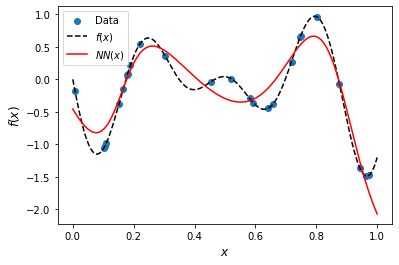

In [188]:
# Code here
# Define a model
model = nn.Sequential(
    nn.Linear(1, 100),
    nn.Tanh(),
    nn.Linear(100, 1)
)

model = training(model,training_iter=1000,lr=1E-2)
X_grid = torch.linspace(0., 1., 5000).unsqueeze(1)
plt.clf()
X, y = get_data(25)
print(X.shape, y.shape, model(X).shape)
plt.scatter(X.detach().numpy(), y.detach().numpy(), label='Data')
plt.plot(X_grid.detach().numpy(), f(X_grid).detach().numpy(),
         ls='--', c='k', label=r'$f(x)$')
plt.plot(X_grid.detach().numpy(), model(
    X_grid).detach().numpy(), c='red', label=r'$NN(x)$')
plt.ylabel(r'$f(x)$', fontsize=12)
plt.xlabel(r'$x$', fontsize=12)
plt.legend()

Work in a small groups and discuss the following.
1. How many layers we need?
2. What is the *best* activation function?


# Extra

Go to the following [link](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.03345&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) and try to solve all the different tasks!

## Stochastic Gradient Descent ##

In the previous tutorial we saw that we could gradient based methods to optimize the parameters of a ML model. <br>
If we give a close look at the ```training()``` function, we can see that at each iteration (step), we used the complete training data to updated the parameters. 
$$
\boldsymbol{\Theta}_{i+1} = \boldsymbol{\Theta}_{i} - \eta \nabla_{\boldsymbol{\Theta}} {\cal L}(\boldsymbol{\Theta}_{i})\\
\boldsymbol{\Theta}_{i+1} = \boldsymbol{\Theta}_{i} - \text{optimizer}(\nabla_{\boldsymbol{\Theta}} {\cal L}(\boldsymbol{\Theta}_{i}))\\
$$
In this general picture, the $\texttt{optimizer}$ dictates the policy to update the parameters given the values of the gradient.

### Torch optimizers ###

There are many optimizers available in ```torch```; [link](https://pytorch.org/docs/stable/optim.html) <br>
The most common ones are, 
1. [```Adam (Adaptive Moment Estimation)```](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwi2u8j6xNOEAxXuJNAFHfSfA_QQFnoECBEQAQ&url=https%3A%2F%2Farxiv.org%2Fabs%2F1412.6980&usg=AOvVaw2YQSuFAZFEf23o6Y5-8oMH&opi=89978449) (168400 citations)
2. [```SGD (Stochastic Gradient Descent)```](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) (~1B citations)
3. [```RMSProp (Root Mean Square Propagation)```](https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf) (does not have a paper, but this website has been cited 1876)

#### minibatch SGD ###
A full optimization when the training data is large, could be **impossible**.<br>
In regression, one way to add "noisy" in the optimization/training is by doing a sub-sampling of the training dataset. <br>

1. At each iteration we randomly selecte a *minibatch* of the training data, ${\cal B}_t$ as the training dataset.
2. Using ${\cal B}_t$, we compute the gradient of the average loss/error function.
3. Update the parameters, 
   $$
    \boldsymbol{\Theta}_{i+1} = \boldsymbol{\Theta}_i - \text{optimizer}(\nabla_{\boldsymbol{\Theta}} \tilde{{\cal L}}(\boldsymbol{\Theta}_{i}; {\cal B}_t))
   $$

Notes: 
1. **hyperparameters**: *minibatch* size and $eta$ are user defined $\to$ *student descent*.
2. The quality of the model is assessed using a *validation* set.

**Data class**

In [197]:
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        label = self.labels[idx]
        return sample, label

In [214]:

# Create a dataset
X, y = get_data(50)
dataset = CustomDataset(X, y)

# Create a DataLoader to batch data
batch_size = 10
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

model = nn.Sequential(
    nn.Linear(1, 100),
    nn.ReLU(),
    nn.Linear(100, 100)
    nn.ReLU(),
    nn.Linear(100, 1)
)

SyntaxError: invalid syntax (3145888324.py, line 14)

In [215]:
# Training loop
def training_minibatch(model,dataloader,lr=1E-2,epochs=50):
    
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    loss_fn = nn.MSELoss()
    model.train()
    
    for epoch in range(epochs):
        # Using tqdm to show progress
        loss_epoch = []
        loop = tqdm(enumerate(dataloader), total=len(dataloader), leave=True)
        for batch_idx, (data, y_tr) in loop:
            # Simulate training steps
            # 1. Zero gradients (if using gradient-based optimization)
            optimizer.zero_grad()
            # 2. Compute prediction (forward pass)
            output = model(data)
            # 3. Compute loss
            loss = loss_fn(output, y_tr)
            # 4. Backpropagation (backward pass)
            loss.backward()
            # 5. Update parameters
            optimizer.step()

            loss_epoch.append(loss.detach())
        # Update progress bar description
            loop.set_description(
                f'Epoch {epoch}, loss = {np.array(loss_epoch).mean():.4f}')
            loop.set_postfix(batch=batch_idx+1)
            # print(np.array(loss_epoch).mean())
            
            # minibatch plotting
            # plt.figure(0)
            # plt.clf()
            # plt.title(f'batch: {batch_idx}')
            # plt.scatter(X.detach().numpy(), y.detach().numpy(), label='Full Data')
            # plt.scatter(data.detach(), y_tr.detach(),label='minibatch')
            # plt.legend(loc=2)
            # plt.ylabel(r'$f(x)$', fontsize=12)
            # plt.xlabel(r'$x$', fontsize=12)
            # plt.ylim(-1.6,1.5)
            # plt.pause(0.1)
    return model

In [218]:
model = training_minibatch(model,dataloader,lr=1E-2,epochs=1000)

Epoch 999, loss = 0.0531: 100%|██████████| 5/5 [00:00<00:00, 760.00it/s, batch=5]


torch.Size([25, 1]) torch.Size([25, 1]) torch.Size([25, 1])


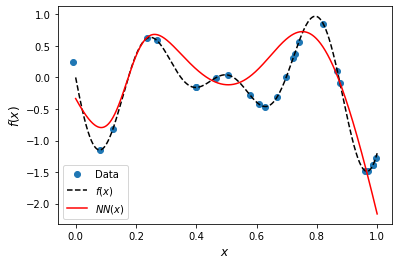

In [219]:
X_grid = torch.linspace(0., 1., 5000).unsqueeze(1)
plt.clf()
X, y = get_data(25)
print(X.shape, y.shape, model(X).shape)
plt.scatter(X.detach().numpy(), y.detach().numpy(), label='Data')
plt.plot(X_grid.detach().numpy(), f(X_grid).detach().numpy(),
         ls='--', c='k', label=r'$f(x)$')
plt.plot(X_grid.detach().numpy(), model(
    X_grid).detach().numpy(), c='red', label=r'$NN(x)$')
plt.ylabel(r'$f(x)$', fontsize=12)
plt.xlabel(r'$x$', fontsize=12)
plt.legend()